<a href="https://colab.research.google.com/github/JUANCHISCO/TALLER-Cu-l-es-el-efecto-de-haber-visto-ballenas-adultas-o-j-venes-en-la-probabilidad-de-pagar-p/blob/main/TALLER_%C2%BFCu%C3%A1l_es_el_efecto_de_haber_visto_ballenas_(adultas_o_j%C3%B3venes)_en_la_probabilidad_de_pagar_por_conservar_2_d%C3%B3lares_cada_semana_durante_10_a%C3%B1os%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
datos = pd.read_csv('datos_whales.csv')

In [4]:
datos

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


In [19]:
datos=datos.drop_duplicates()

Exploración inicial

In [6]:
datos.head(10)

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
5,Australia,0,65.0,Male,Post-graduate degree,"$40,001 - $50,000",45000.5,3,Yes,1.0,Same,1
6,Australia,0,49.0,Male,Post-graduate degree,"$20,001 - $30,000",25000.5,2,No,2.0,Less,1
7,UK,0,38.0,Female,Post-graduate degree,"More than $70,000",85000.5,0,Yes,0.0,More,0
8,Australia,0,54.0,Male,Completed year 12,"More than $70,000",85000.5,6,Yes,5.0,Same,1
9,Australia,0,59.0,Female,Completed year 10,"Less than $20,000",10000.0,4,No,0.0,More,0


In [7]:
datos.tail(10)

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
691,Italy,0,58.0,Female,Diploma,NaN,NaN,8,Yes,0.0,Less,1
692,Australia,0,53.0,Female,Post-graduate degree,"More than $70,000",85000.5,4,Yes,0.0,Less,1
693,Australia,0,34.0,Female,Completed year 10,"$50,001 - $60,000",55000.5,4,Yes,5.0,Less,1
694,The Netherlands,0,31.0,Female,Degree,"$50,001 - $60,000",55000.5,4,No,0.0,More,1
695,Australia,0,40.0,Female,Completed year 12,"$50,001 - $60,000",55000.5,15,No,10.0,Same,1
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1
700,Australia,0,32.0,Male,Degree,"More than $70,000",85000.5,8,Yes,0.0,Same,0


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      701 non-null    object 
 1   SeeWhales    701 non-null    int64  
 2   Age          691 non-null    float64
 3   Gender       701 non-null    object 
 4   Education    701 non-null    object 
 5   Income_AUD   674 non-null    object 
 6   Income       674 non-null    float64
 7   AdultWhales  701 non-null    int64  
 8   YoungWhales  701 non-null    object 
 9   Max_wtp      701 non-null    float64
 10  wtp          701 non-null    object 
 11  PayConserve  701 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 65.8+ KB


In [22]:
datos=datos.dropna()

In [23]:
datos.isna().sum()

Country        0
SeeWhales      0
Age            0
Gender         0
Education      0
Income_AUD     0
Income         0
AdultWhales    0
YoungWhales    0
Max_wtp        0
wtp            0
PayConserve    0
dtype: int64

In [13]:
datos.describe()

,SeeWhales,Age,Income,AdultWhales,Max_wtp,PayConserve
count,701.000000,691.000000,674.000000,701.000000,701.000000,701.000000
mean,0.126961,42.918958,44540.456973,6.058488,3.149786,0.660485
std,0.333168,15.562472,26362.209685,3.779758,18.043962,0.473883
min,0.000000,13.000000,10000.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,25000.500000,4.000000,0.000000,0.000000
50%,0.000000,41.000000,35000.500000,6.000000,0.000000,1.000000
75%,0.000000,54.500000,65000.500000,8.000000,2.000000,1.000000
max,1.000000,82.000000,85000.500000,30.000000,250.000000,1.000000


In [14]:
datos.shape

(701, 12)

Conclusión: En este apartado se observan 701 datos, 12 variables y ningún dato faltante. Donde las variables son Country el cual es el país de origen, SeeWhales si vio o no ballenas, Age la edad, Gender el género Education el nivel educativo,Income_AUD que es el ingreso categorizado ,Income el ingreso en dólares australianos, AdultWhales el número de ballenas adultas vistas,YoungWhales si vio o no ballenas jóvenes,Max_wtp La máxima disposición a pagar,wtp el qué tan dispuesto está a pagar por la conservación de las ballenas,y PayConserve la cual es la disposición a pagar o no 2 dólares cada semana durante 10 años por conservar el espacio para avistar ballenas.

##Verificación de duplicados

1.   Elemento de lista
2.   Elemento de lista


In [20]:
datos.duplicated().sum()

0

In [24]:
for i in datos.columns:
  print(i, datos[i].nunique())

Country 22
SeeWhales 2
Age 67
Gender 2
Education 9
Income_AUD 7
Income 7
AdultWhales 21
YoungWhales 2
Max_wtp 22
wtp 3
PayConserve 2


In [25]:
for i in datos.columns:
  print(datos[i].unique())

['Australia' 'UK' 'USA' 'France' 'New Zealand' 'Canada' 'Italy' 'Germany'
 'Switzerland' 'Ireland' 'Sweden' 'Denmark' 'Spain' 'The Netherlands'
 'Singapore' 'Israel' 'Kenya' 'Czech Republic' 'China' 'Norway' 'Belgium'
 'South Africa']
[1 0]
[31. 22. 46. 37. 65. 49. 38. 54. 59. 52. 40. 48. 26. 42. 24. 41. 60. 57.
 23. 55. 47. 51. 70. 53. 50. 75. 33. 61. 29. 30. 25. 32. 63. 58. 18. 44.
 43. 56. 36. 35. 28. 67. 68. 27. 34. 62. 66. 71. 64. 45. 39. 21. 76. 20.
 16. 13. 72. 78. 15. 69. 14. 82. 19. 80. 73. 17. 79.]
['Female' 'Male']
['Diploma' 'Degree' 'Post-graduate degree' 'Completed year 12'
 'Completed year 10' 'Trade certificate' 'Some secondary schooling'
 'Primary only' 'Other - Specify']
['$60,001 - $70,000' 'Less than $20,000' 'More than $70,000'
 '$20,001 - $30,000' '$40,001 - $50,000' '$30,001 - $40,000'
 '$50,001 - $60,000']
[65000.5 10000.  85000.5 25000.5 45000.5 35000.5 55000.5]
[ 2  6  7  4  3  0 12  5 15  8 10  9 11 20  1 19 13 14 30 16 18]
['Yes' 'No']
[0.0e+00 1.0e+00 2.0e+

Verificación de datos nulos

Visualización de datos

Visualización univariada

In [39]:
datos

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
5,Australia,0,65.0,Male,Post-graduate degree,"$40,001 - $50,000",45000.5,3,Yes,1.0,Same,1
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


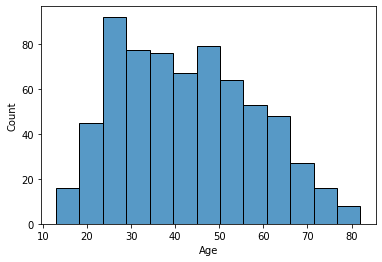

In [29]:
sns.histplot(datos['Age'])

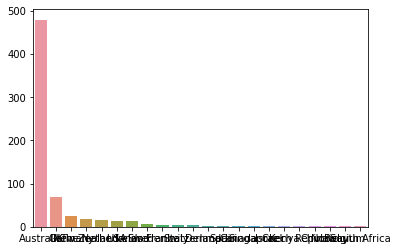

In [38]:
Country = datos['Country'].value_counts()
sns.barplot (x=Country.index, y=Country.values)
plt.show()

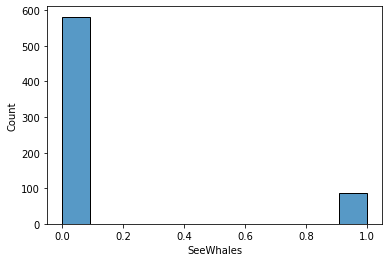

In [40]:
sns.histplot(datos['SeeWhales'])

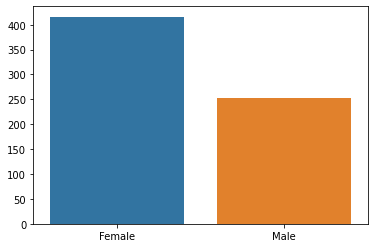

In [41]:
Gender= datos['Gender'].value_counts()
sns.barplot (x=Gender.index, y=Gender.values)
plt.show()

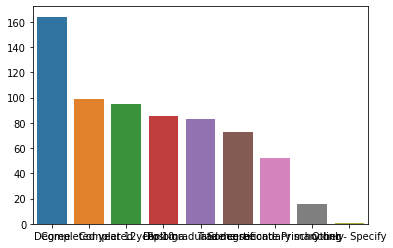

In [43]:
Education = datos['Education'].value_counts()
sns.barplot (x=Education.index, y=Education.values)
plt.show()

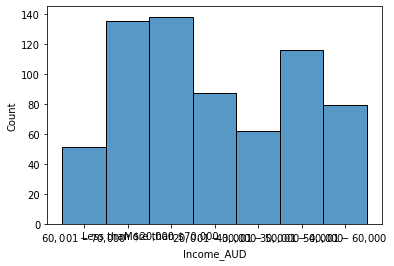

In [44]:
sns.histplot(datos['Income_AUD'])

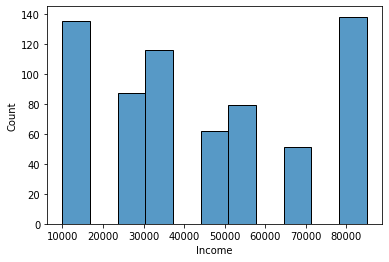

In [45]:
sns.histplot(datos['Income'])

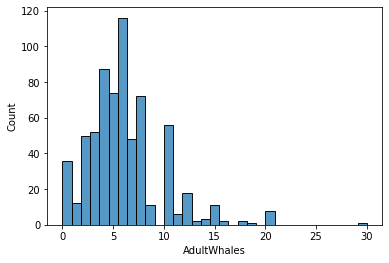

In [46]:
sns.histplot(datos['AdultWhales'])

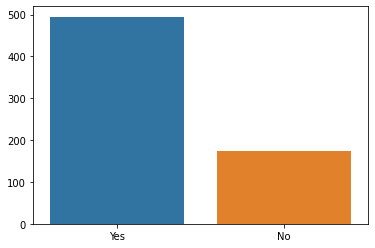

In [47]:
YoungWhales = datos['YoungWhales'].value_counts()
sns.barplot (x=YoungWhales.index, y=YoungWhales.values)
plt.show() 

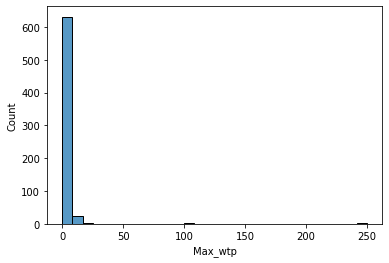

In [49]:
sns.histplot(datos['Max_wtp'],bins=30) 

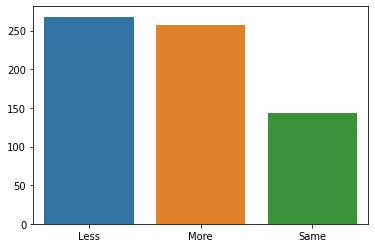

In [50]:
wtp= datos['wtp'].value_counts()
sns.barplot (x=wtp.index, y=wtp.values)
plt.show() 

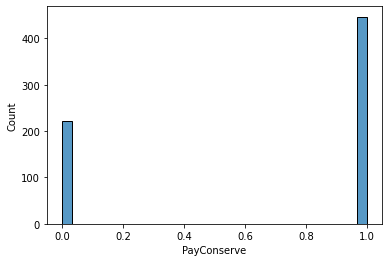

In [52]:
sns.histplot(datos['PayConserve'],bins=30) 

##Visualización bivariada

In [53]:
datos

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
5,Australia,0,65.0,Male,Post-graduate degree,"$40,001 - $50,000",45000.5,3,Yes,1.0,Same,1
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,Yes,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,Yes,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,No,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,Yes,5.0,Same,1


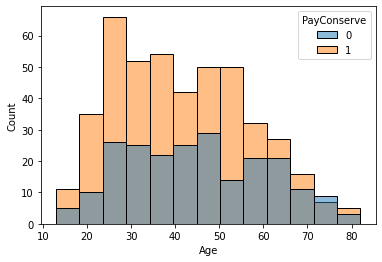

In [68]:
sns.histplot(data = datos, x= 'Age', hue="PayConserve")


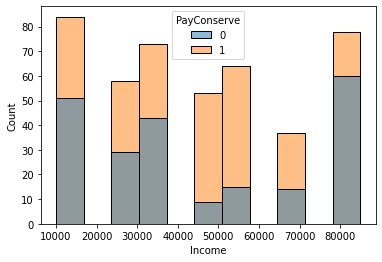

In [69]:
sns.histplot(data = datos, x= 'Income', hue="PayConserve")


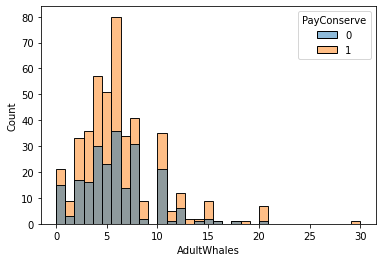

In [70]:
sns.histplot(data = datos, x= 'AdultWhales', hue="PayConserve")

In [71]:
datos.columns

Index(['Country', 'SeeWhales', 'Age', 'Gender', 'Education', 'Income_AUD',
       'Income', 'AdultWhales', 'YoungWhales', 'Max_wtp', 'wtp',
       'PayConserve'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


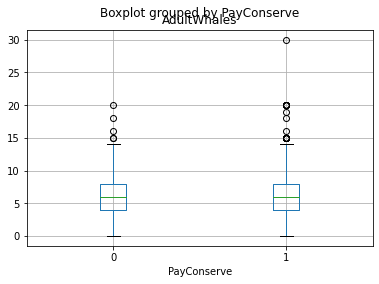

In [74]:
datos.boxplot(column="AdultWhales",by="PayConserve")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


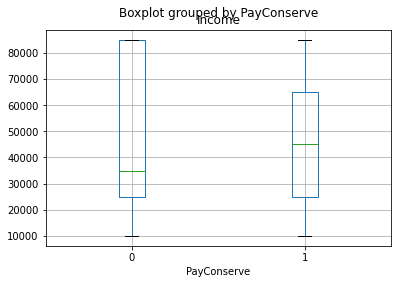

In [75]:
datos.boxplot(column="Income",by="PayConserve")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


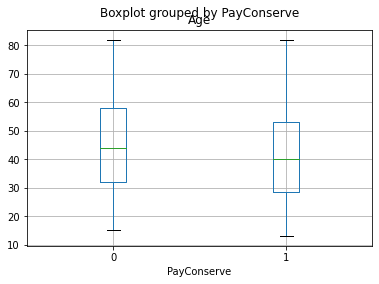

In [76]:
datos.boxplot(column="Age",by="PayConserve")

##Análisis de correlación

In [77]:
datos.corr('pearson')

,SeeWhales,Age,Income,AdultWhales,Max_wtp,PayConserve
SeeWhales,1.000000,0.132323,-0.016512,0.059876,0.072767,0.080293
Age,0.132323,1.000000,-0.099886,0.090113,-0.051015,-0.101716
Income,-0.016512,-0.099886,1.000000,0.059070,0.051494,-0.016063
AdultWhales,0.059876,0.090113,0.059070,1.000000,0.243281,0.040078
Max_wtp,0.072767,-0.051015,0.051494,0.243281,1.000000,0.125401
PayConserve,0.080293,-0.101716,-0.016063,0.040078,0.125401,1.000000


In [78]:
datos.corr('spearman')

,SeeWhales,Age,Income,AdultWhales,Max_wtp,PayConserve
SeeWhales,1.000000,0.132654,-0.013938,0.054898,-0.007373,0.080293
Age,0.132654,1.000000,-0.057471,0.064349,-0.191821,-0.097485
Income,-0.013938,-0.057471,1.000000,0.058659,0.106140,0.003990
AdultWhales,0.054898,0.064349,0.058659,1.000000,0.040770,0.015463
Max_wtp,-0.007373,-0.191821,0.106140,0.040770,1.000000,0.570777
PayConserve,0.080293,-0.097485,0.003990,0.015463,0.570777,1.000000


In [98]:
datos.replace({"YoungWhales":{"Yes":1,"No":0}})

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,1,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,0,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,0,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,1,0.0,More,1
5,Australia,0,65.0,Male,Post-graduate degree,"$40,001 - $50,000",45000.5,3,1,1.0,Same,1
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Australia,0,56.0,Female,Completed year 10,"Less than $20,000",10000.0,0,1,1.0,Same,1
697,Australia,0,38.0,Female,Completed year 10,"$30,001 - $40,000",35000.5,6,1,2.0,Same,1
698,Australia,0,24.0,Female,Diploma,"$20,001 - $30,000",25000.5,6,0,2.0,Less,1
699,Australia,0,50.0,Male,Post-graduate degree,"$30,001 - $40,000",35000.5,2,1,5.0,Same,1


In [99]:
datos=datos.replace({"YoungWhales":{"Yes":1,"No":0}})

##Modelamiento

In [101]:
x = datos[['YoungWhales', 'Age', 'Income', 'AdultWhales', 'Max_wtp',]]
y = datos['PayConserve'] 
x= sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [102]:
y = datos['PayConserve'] 

In [103]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PayConserve   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.612
Date:                Fri, 28 Oct 2022   Prob (F-statistic):            0.00313
Time:                        18:37:53   Log-Likelihood:                -435.24
No. Observations:                 668   AIC:                             882.5
Df Residuals:                     662   BIC:                             909.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7914      0.073     10.913      0.000       0.649       0.934
YoungWhales     0.0159      0.042      0.382      0.703      -0.066       0.098
Age            -0.0031      0.001     -2.622      0.009      -0.005      -0.001
Income      -6.326e-07   6.98e-07     -0.907      0.365      -2e-06    7.37e-07
AdultWhales     0.0029      0.005      0.585      0.559      -0.007       0.013
Max_wtp         0.0029      0.001      2.912      0.004       0.001       0.005
==============================================================================
Omnibus:                     5964.347   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.244
Skew:                          -0.682   Prob(JB):                     4.23e-25
Kurtosis:                       1.525   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##INTERPRETACIÓN DEL MODELO.

1. Las Variables "Income", "AdultWhales" y "YoungWhales" No son significativas.
2. Las variables "Max_Wtp" y "Age" son significativas. 
3. Si se agrega un año mas de vida la probabilidad diminuye en 0.31% con respecto a pagar 2 dolares cada semana durante 10 años por conservar espacios para avistar ballenas. 
4. Cada que se aumenta el salario en una unidad la probabilidad de pagar 2 dolares por conservar el espacio para avisatr ballenas cae en 6.32%. 
5. Si se agrega un avistamiento mas de ballenas jovenes la probabilidad de pagar por conservar el espacio para las ballenas aumenta en 1.59%






##CONCLUSIONES.


El avistamiento de ballenas si influye en que se pague o no por la conservacion del espacio para avistar ballenas, sin embargo no son variables estadisticamente significativas y no se pueden proyectar a  toda la pobalcion si no solo para la muestra dada.
